## Non-stiff differential equations

In [1]:
import warnings
# suppress runtime warning that can be generated for example by fsolve
warnings.filterwarnings('ignore', category=RuntimeWarning)
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import math
import numbers
import scipy as sp
from scipy.optimize import fsolve

In [2]:
def showRes(y_arr, t_arr, e):
    x, z = y_arr.transpose()
    plt.figure(figsize=[10,10])
    plt.title('e = {0}'.format(e))

    size = 2
    plt.scatter(t_arr, x, label='x', s = size)
    plt.scatter(t_arr, z, label='z', s = size)
    
    plt.legend()
    plt.show()

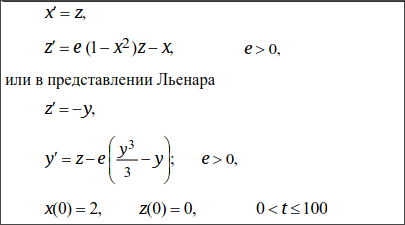

In [3]:
x0 = 2
z0 = 0

def F(t, y_vec, e):
    x, z = y_vec
    return np.array([
        z,
        e*(1 - x*x)*z - x
    ])

### Runge-Kutta method
3/8-rule fourth-order method     
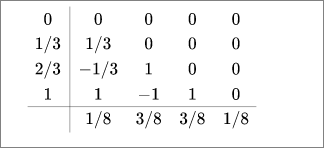

In [4]:
def solveOdeRK4(y0, t_start, t_end, h, f):
    y_arr = []
    t_arr = []

    y_arr.append(y0)
    t_arr.append(t_start)

    n = int((t_end - t_start)/h)
    
    for i in range(n):
        yn = y_arr[i]
        tn = t_arr[i]
        
        k1 = f(tn, yn)
        k2 = f(tn + h / 3, yn + k1*h / 3)
        k3 = f(tn + 2*h / 3, yn - k1*h / 3 + k2*h)
        k4 = f(tn + h, yn + k1*h - k2*h + k3*h)

        yn1 = yn + h*((1/8)*k1 + (3/8)*k2 + (3/8)*k3 + (1/8)*k4)
        tn1 = tn + h
        
        y_arr.append(yn1)
        t_arr.append(tn1)
    
    return np.array(y_arr), np.array(t_arr)

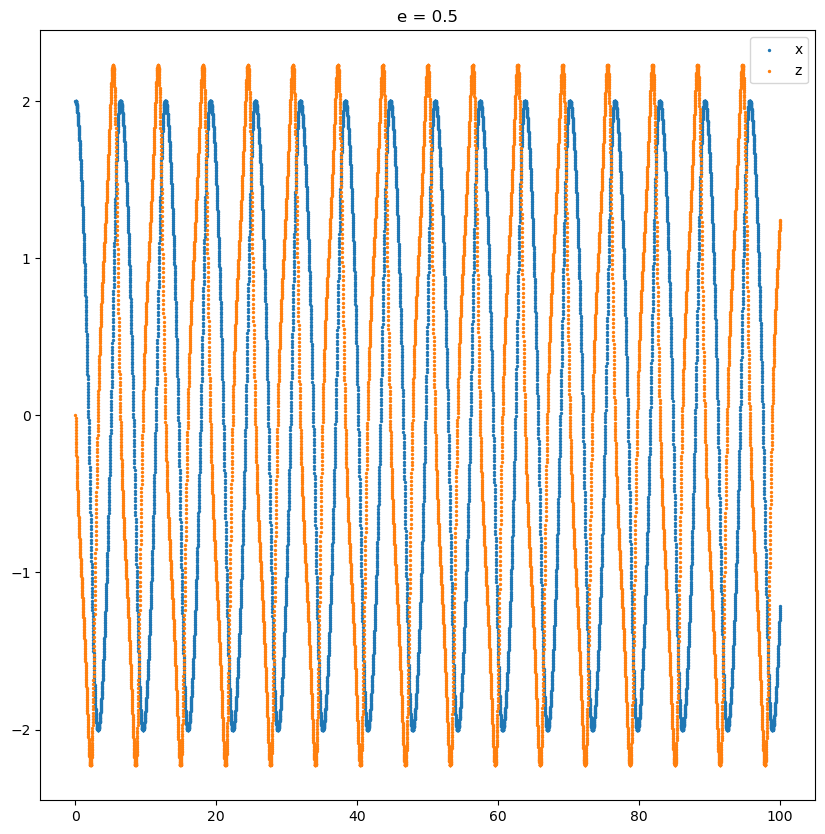

In [5]:
e = 0.5
y_arr, t_arr = solveOdeRK4(np.array([x0, z0]), 0, 100, 0.01, lambda t, y_vec: F(t, y_vec, e))
showRes(y_arr, t_arr, e)

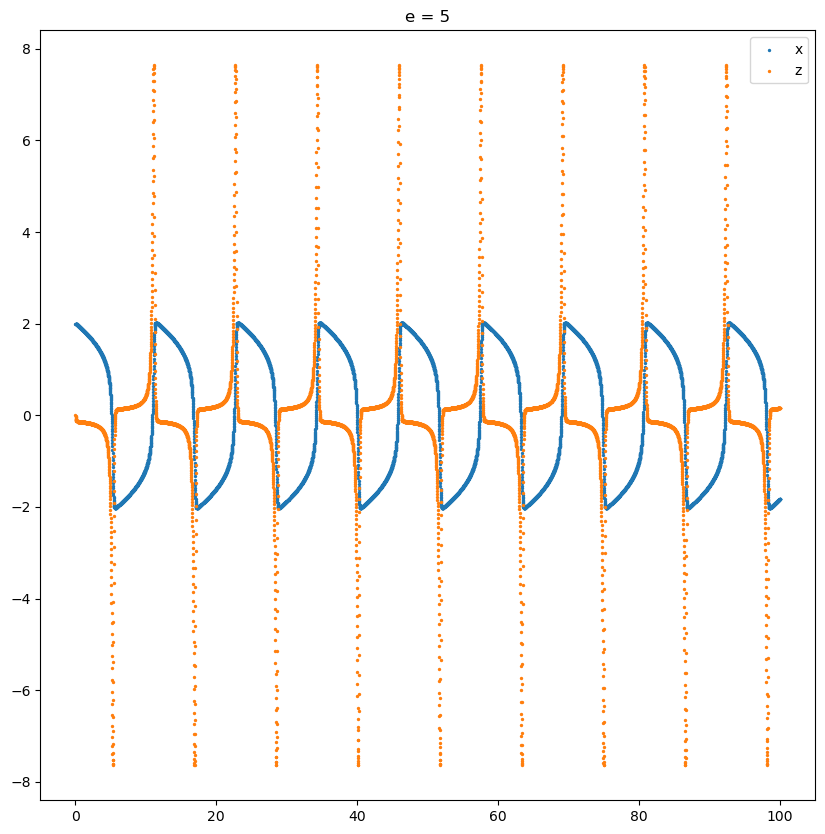

In [6]:
e = 5
y_arr, t_arr = solveOdeRK4(np.array([x0, z0]), 0, 100, 0.01, lambda t, y_vec: F(t, y_vec, e))
showRes(y_arr, t_arr, e)

### Adams method
Adams 4-order multistep method   
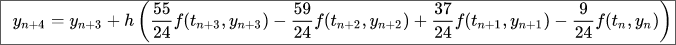

In [7]:
# un <=> yn
def solveOdeAdams4(y0, t_start, t_end, h, f):
    y_arr, t_arr = solveOdeRK4(y0, t_start, t_start + 3*h, h, f)
    y_arr = list(y_arr)
    t_arr = list(t_arr)
    
    n = int((t_end - t_start)/h) - 4

    for i in range(n):
        yn = y_arr[i]
        tn = t_arr[i]
    
        yn1 = y_arr[i+1]
        tn1 = t_arr[i+1]

        yn2 = y_arr[i+2]
        tn2 = t_arr[i+2]

        yn3 = y_arr[i+3]
        tn3 = t_arr[i+3]
    
        yn4 = yn3 + h*((55/24)*f(tn3, yn3) - (59/24)*f(tn2, yn2) + (37/24)*f(tn1, yn1) - (9/24)*f(tn,yn))
        tn4 = tn3 + h
        
        y_arr.append(yn4)
        t_arr.append(tn4)

    return np.array(y_arr), np.array(t_arr)


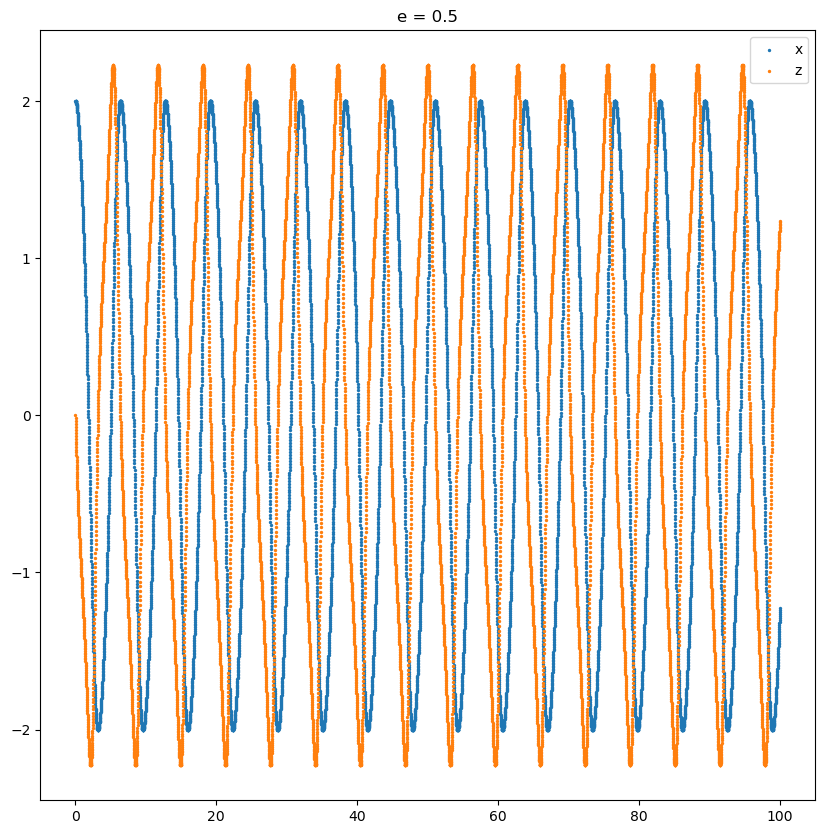

In [8]:
e = 0.5
y_arr, t_arr = solveOdeAdams4(np.array([x0, z0]), 0, 100, 0.01, lambda t, y_vec: F(t, y_vec, e))
showRes(y_arr, t_arr, e)

### Backward Differentiation Formula
BDF 4-order multistep method   
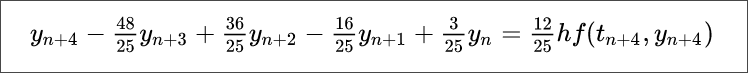

In [9]:
# un <=> yn
def solveOdeBDF4(y0, t_start, t_end, h, f):
    y_arr, t_arr = solveOdeRK4(y0, t_start, t_start + 3*h, h, f)
    y_arr = list(y_arr)
    t_arr = list(t_arr)
    
    n = int((t_end - t_start)/h) - 4

    for i in range(n):
        yn = y_arr[i]
        tn = t_arr[i]
    
        yn1 = y_arr[i+1]
        tn1 = t_arr[i+1]

        yn2 = y_arr[i+2]
        tn2 = t_arr[i+2]

        yn3 = y_arr[i+3]
        tn3 = t_arr[i+3]

        tn4 = tn3 + h
        snae = lambda yn4: yn4 - (48/25)*yn3 + (36/25)*yn2 - (16/25)*yn1 + (3/25)*yn - (12/25)*h*f(tn4, yn4)
        yn4 = fsolve(snae, yn3)
        
        y_arr.append(yn4)
        t_arr.append(tn4)

    return np.array(y_arr), np.array(t_arr)


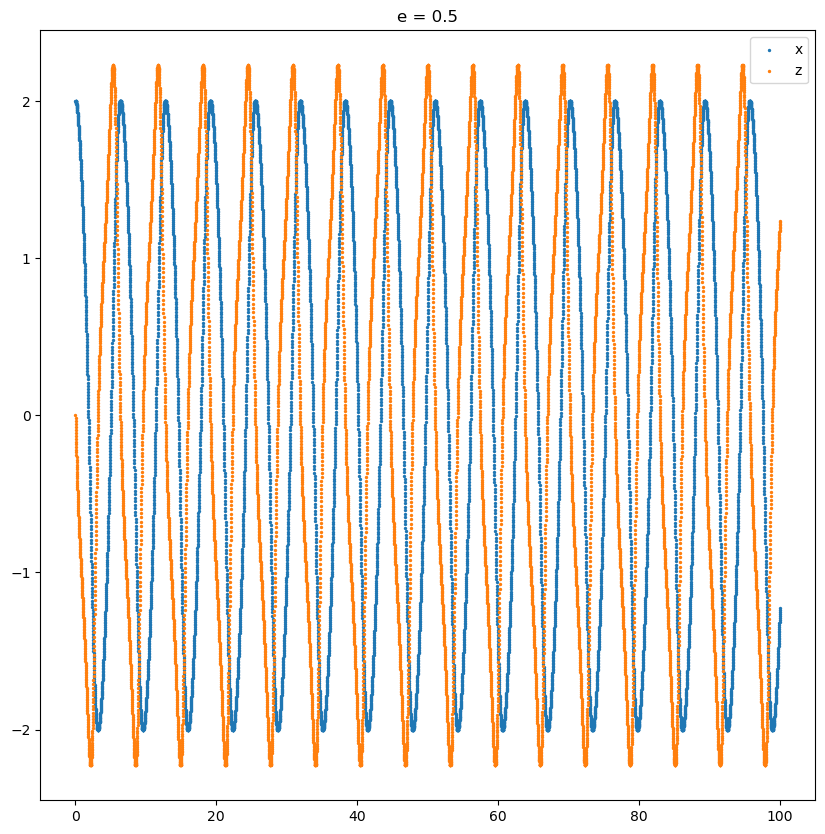

In [10]:
e = 0.5
y_arr, t_arr = solveOdeBDF4(np.array([x0, z0]), 0, 100, 0.01, lambda t, y_vec: F(t, y_vec, e))
showRes(y_arr, t_arr, e)

## Stiff differential equations

In [11]:
def showRes(y_arr, t_arr):
    y1, y3 = y_arr.transpose()
    fig, ax = plt.subplots(2, figsize=(10, 10))

    size = 2
    ax[0].scatter(t_arr, y1, label='y1', s = size, color='red')
    ax[1].scatter(t_arr, y3, label='y3', s = size)
    ax[0].legend()
    ax[1].legend()
    plt.show()

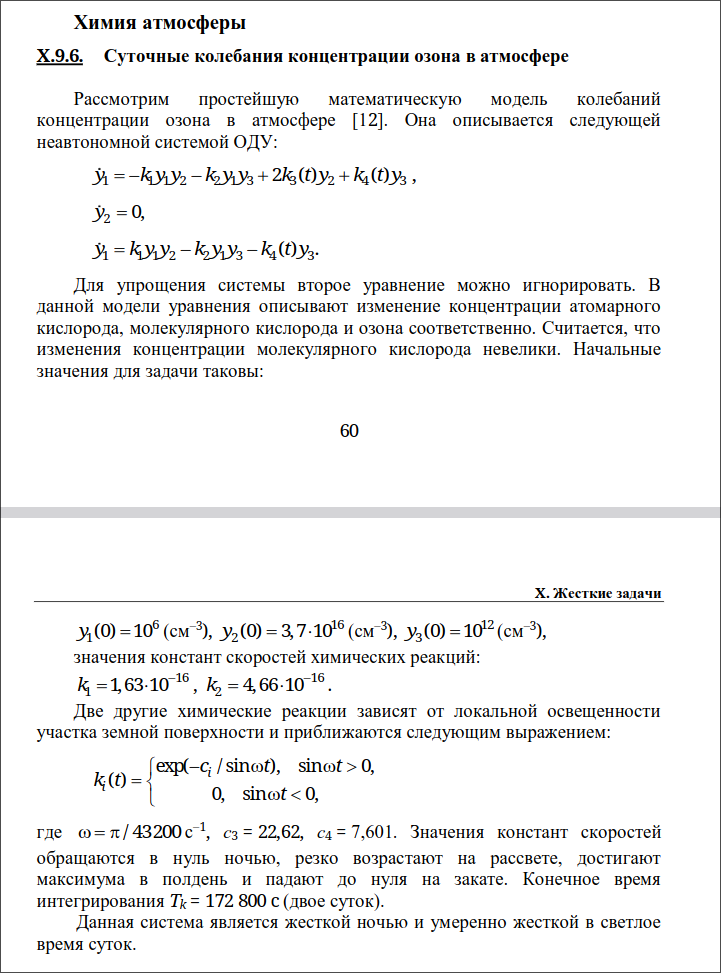

In [12]:
y1_0 = 10**6
y2_0 = 3.7*(10**16)
y3_0 = 10**12
k1 = 1.63*(10**(-16))
k2 = 4.66*(10**(-16))
w = np.pi / 43200
c3 = 22.62
c4 = 7.601

def k3(t):
    if (np.sin(w*t) > 0):
        return np.exp(-c3/np.sin(w*t))
    return 0

def k4(t):
    if (np.sin(w*t) > 0):
        return np.exp(-c4/np.sin(w*t))
    return 0

def F(t, y_vec):
    y1, y3 = y_vec
    return np.array([
        -k1*y1*y2_0 - k2*y1*y3 + 2*k3(t)*y2_0 + k4(t)*y3,
        k1*y1*y2_0 - k2*y1*y3 - k4(t)*y3
    ])
    

### Implicit Runge-Kutta method
2nd order method  
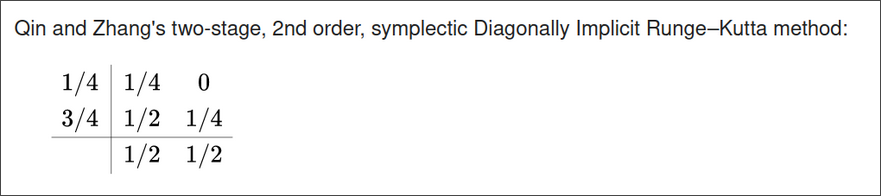

In [13]:
def solveOdeIRK2(y0, t_start, t_end, h, f):
    y_arr = []
    t_arr = []
    
    y_arr.append(y0)
    t_arr.append(t_start)

    n = int((t_end - t_start)/h)
    
    for i in range(n):
        yn = y_arr[i]
        tn = t_arr[i]

        k1_snae = lambda k: k - f(tn + (1/4)*h, yn + (1/4)*h*k)
        k2_snae = lambda k: k - f(tn + (3/4)*h, yn + (1/2)*h*k1 + (1/4)*h*k)
        
        k1 = fsolve(k1_snae, yn)
        k2 = fsolve(k2_snae, yn)
        
        yn1 = yn + h*((1/2)*k1 + (1/2)*k2)
        tn1 = tn + h
        
        y_arr.append(yn1)
        t_arr.append(tn1)

    return np.array(y_arr), np.array(t_arr)


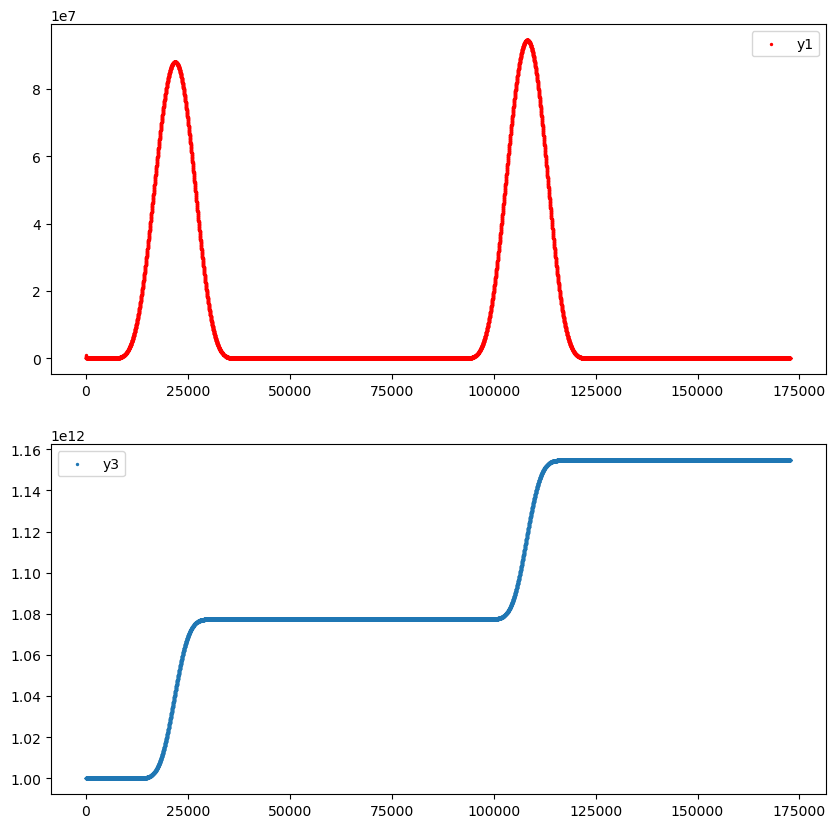

In [14]:
y_arr, t_arr = solveOdeIRK2(np.array([y1_0, y3_0]), 0, 172800, 10, F)
showRes(y_arr, t_arr)

## Rosenbrock method

Rosenbrock's 2nd order   
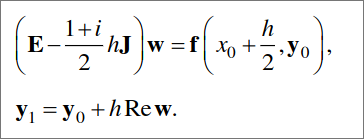

In [15]:
def solveOdeRosenbrock2(y0, t_start, t_end, h, f):
    y_arr = []
    t_arr = []
    
    y_arr.append(y0)
    t_arr.append(t_start)

    n = int((t_end - t_start)/h)
    
    for i in range(n):
        yn = y_arr[i]
        tn = t_arr[i]

        # numerical derivative
        delta_y = 10**(-8)
        J = (f(tn, yn + delta_y) - f(tn, yn - delta_y)) / (2*delta_y)
        E = np.eye(y0.size)

        A = E - ((1+1j)/2)*h
        b = f(tn + h/2, yn)
        
        w = np.linalg.solve(A, b)
        
        yn1 = yn + h * w.real
        tn1 = tn + h
        
        y_arr.append(yn1)
        t_arr.append(tn1)

    return np.array(y_arr), np.array(t_arr)


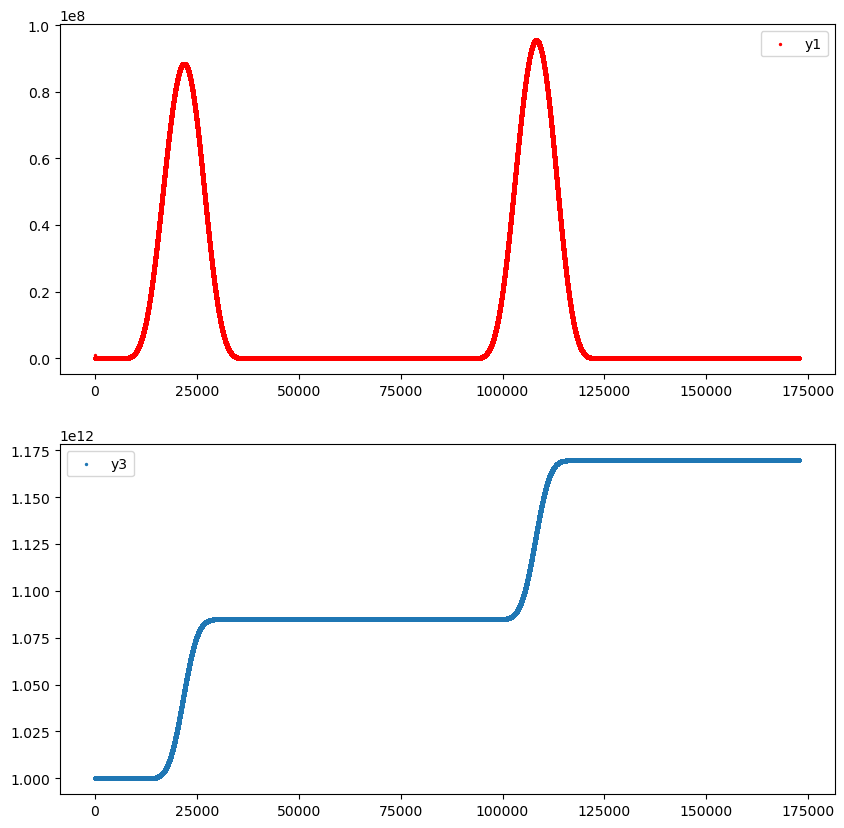

In [16]:
y_arr, t_arr = solveOdeRosenbrock2(np.array([y1_0, y3_0]), 0, 172800, 0.1, F)
showRes(y_arr, t_arr)

### Nordsik representation of Adams methods
Adams' 2nd order (k=2)   
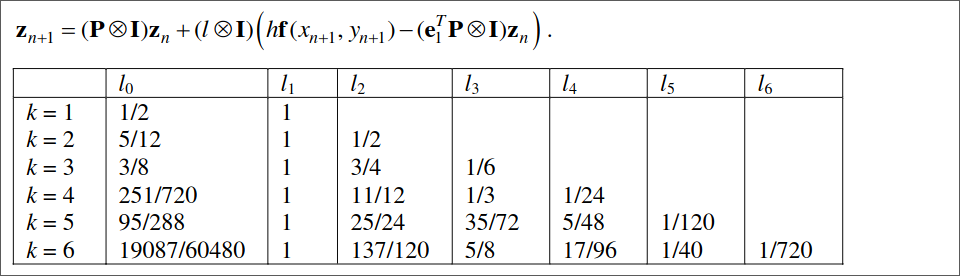


In [17]:
def solveOdeNordsikAdams2(y0, t_start, t_end, h, f): 
    order = 2
    
    y_arr = []
    t_arr = []
    
    y_arr.append(y0)
    t_arr.append(t_start)

    n = int((t_end - t_start)/h)

    e = np.array([0, 1, 0])
    L = np.array([5/12, 1, 1/2])
    P = sp.linalg.pascal(order + 1, kind = 'upper')
    
    zn1 = np.zeros((order + 1, y0.size))
    zn1[0] = y0
    zn1[1] = h*f(t_start, y0)

    for i in range(n):
        yn = y_arr[i]
        tn = t_arr[i]
        zn = zn1

        inter = P @ zn
        zn1 = inter + np.outer(L, (h*f(tn, yn) - np.dot(e, inter)))

        yn1 = zn1[0]
        tn1 = tn + h
        
        y_arr.append(yn1)
        t_arr.append(tn1)

    return np.array(y_arr), np.array(t_arr)

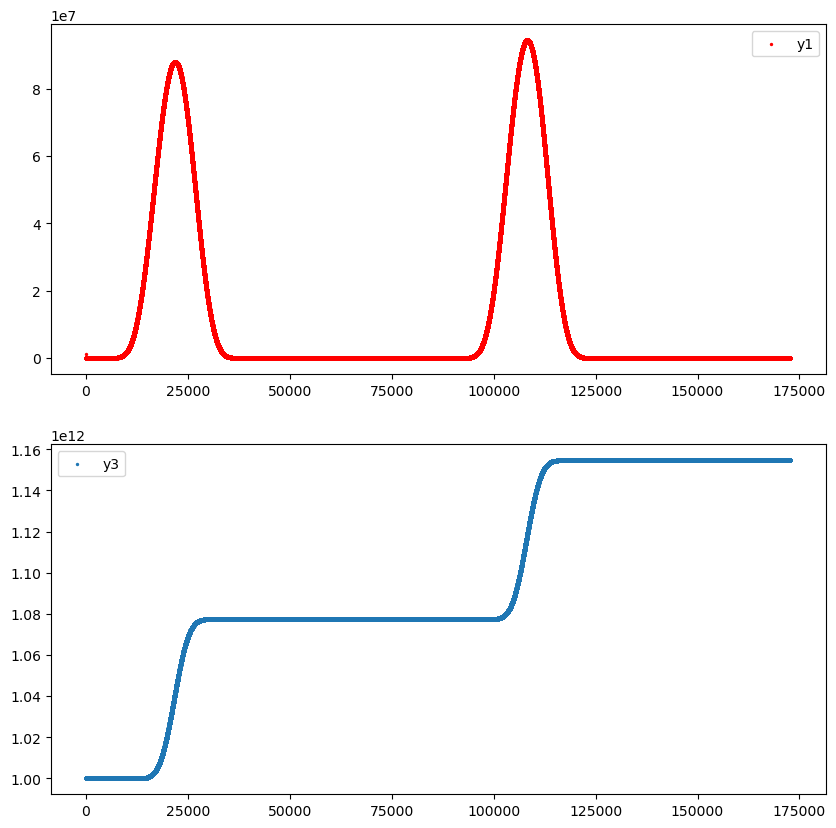

In [18]:
y_arr, t_arr = solveOdeNordsikAdams2(np.array([y1_0, y3_0]), 0, 172800, 0.1, F)
showRes(y_arr, t_arr)